In [1]:
from Simulation.sys_ids import *
import pickle

## Generate step test data for system identification

In [2]:
# System and Snapshot paths
path = "C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\C2S_SS_simulation4.dynf"
path_snaps = "C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\AM_C2S_SS_simulation4"

In [3]:
# First initiate the system
# Nominal Conditions
nominal_conditions =  np.array([1.50032484e+05, -2.10309105e+01, 2.08083248e+01, 6.30485237e-01, 3.69514734e-01, -2.40000000e+01])

# Steady State inputs
ss_inputs = np.array([320000.0, 110.0])
# ss_inputs = np.array([370000.0, 125.0])

# Sampling time of the system
delta_t = 1 / 6 # 10 mins

In [4]:
# steady state values
dl = DistillationColumnAspen(path, ss_inputs, nominal_conditions)
steady_states={"ss_inputs":dl.ss_inputs,
               "y_ss":dl.y_ss}
dl.close(path_snaps)

Initialization has been completed
Steady State has been completed
System is in open loop condition now!
Steady state reached!
Deleted the last created snapshot starting with 'snp': C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\AM_C2S_SS_simulation4\snpA0000.snp
Deleted the last created snapshot starting with 'snp': C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\AM_C2S_SS_simulation4\snpA0001.snp


In [5]:
print(steady_states)

{'ss_inputs': array([3.2e+05, 1.1e+02]), 'y_ss': array([  0.1003974 , -22.95514339])}


Initialization has been completed
Steady State has been completed
System is in open loop condition now!
Steady state reached!


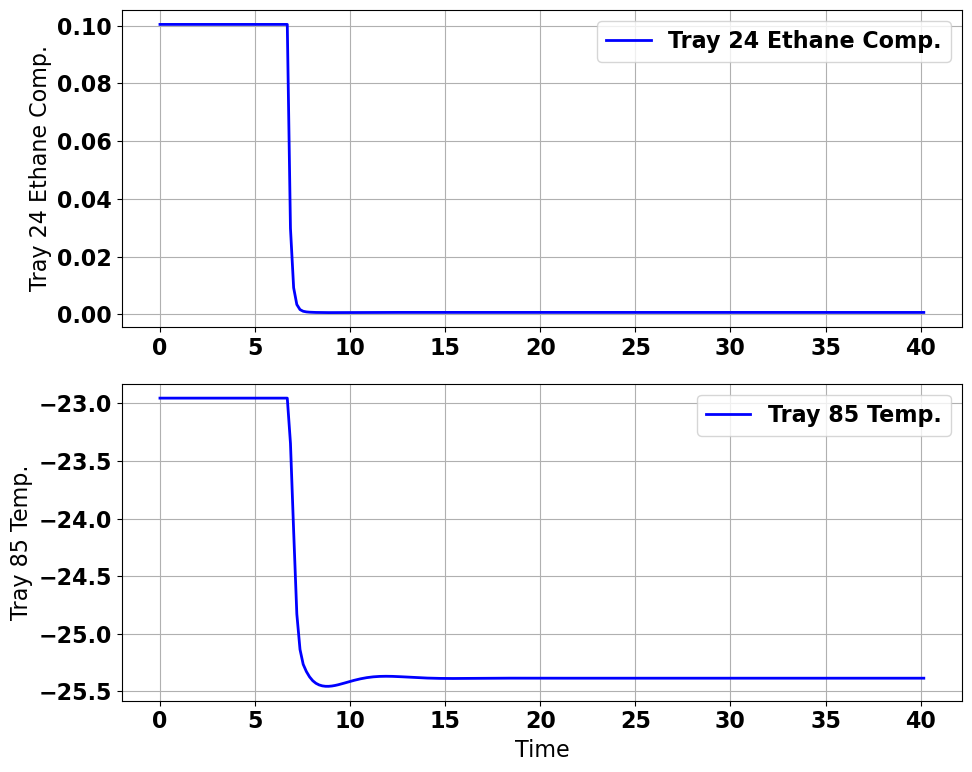

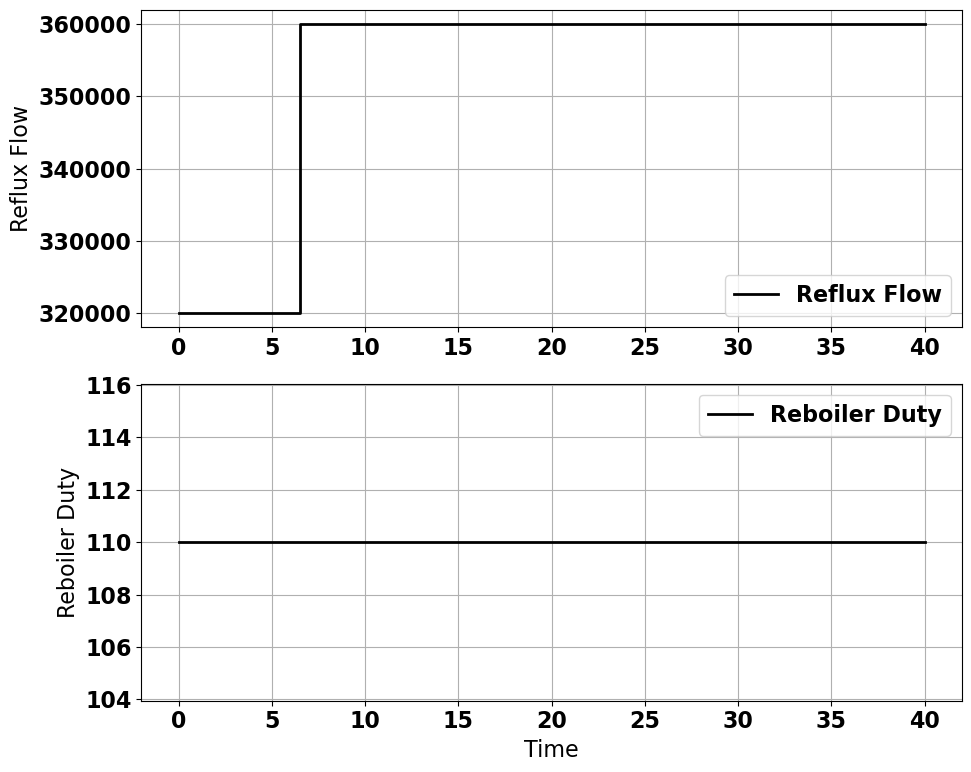

Deleted the last created snapshot starting with 'snp': C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\AM_C2S_SS_simulation4\snpA0000.snp
Deleted the last created snapshot starting with 'snp': C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\AM_C2S_SS_simulation4\snpA0001.snp
Initialization has been completed
Steady State has been completed
System is in open loop condition now!
Steady state reached!


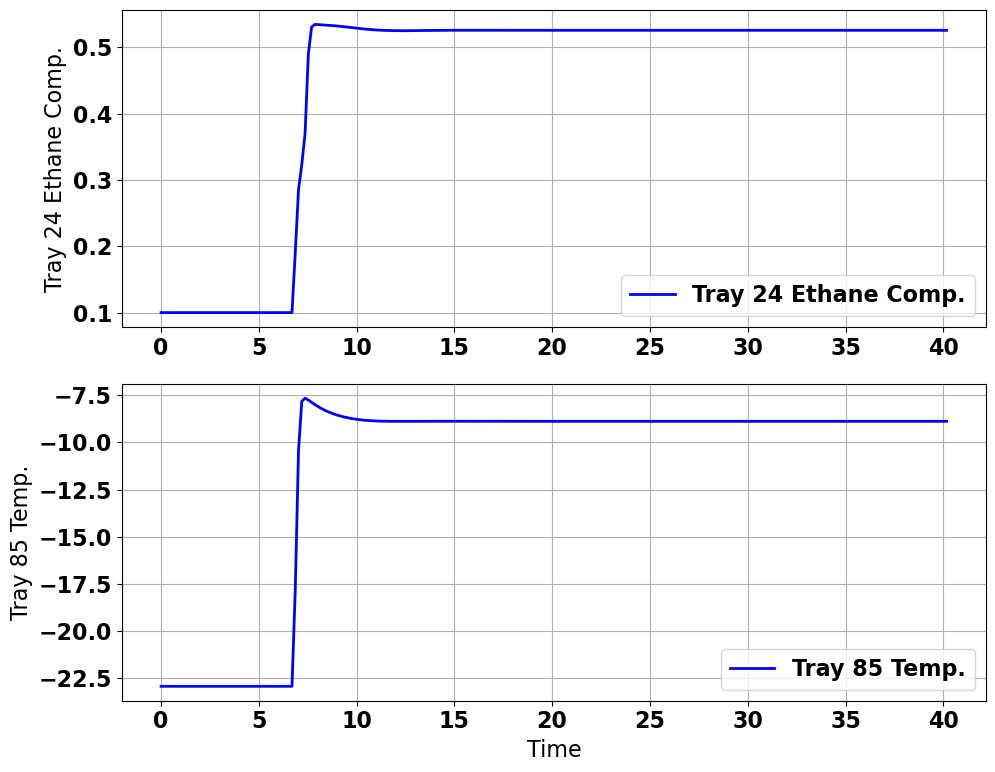

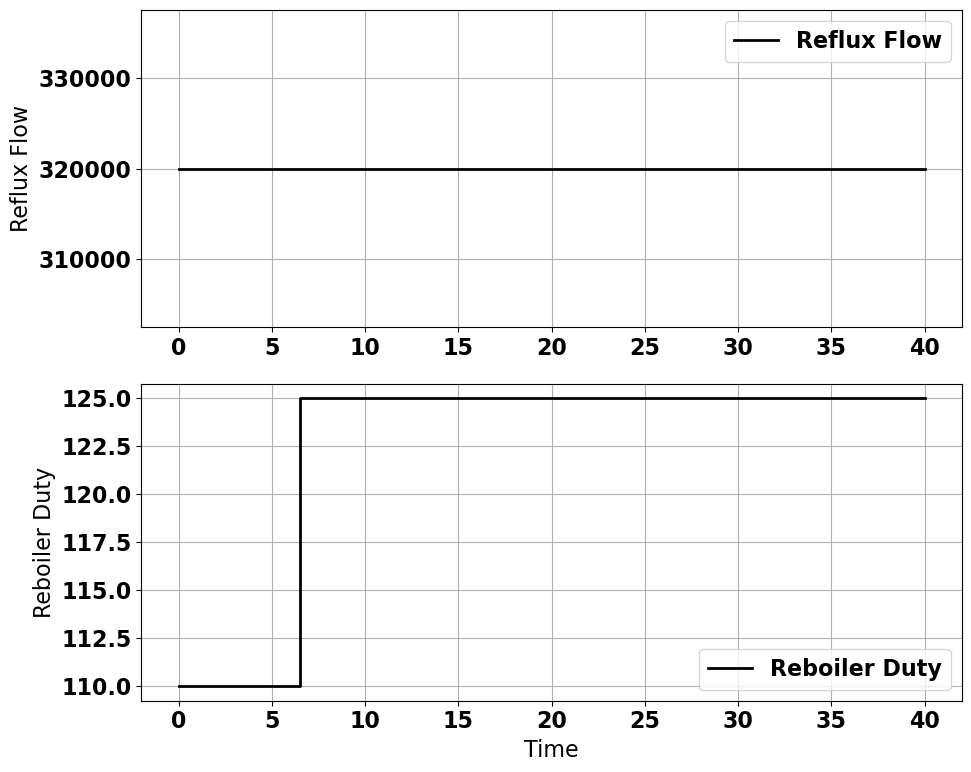

Deleted the last created snapshot starting with 'snp': C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\AM_C2S_SS_simulation4\snpA0000.snp
Deleted the last created snapshot starting with 'snp': C:/Users\hamed\Desktop\FinalDocuments\FinalDocuments\C2SplitterControlFiles\AspenFiles\dynsim\Plant\AM_C2S_SS_simulation4\snpA0001.snp


In [6]:
# Run Experiment 1
results_exp1 = run_dl_experiment(step_value=40000, step_channel=0, save_filename="Reflux.csv",
                                 path=path, ss_inputs=steady_states["ss_inputs"],
                                 nominal_conditions=nominal_conditions, delta_t=delta_t, path_snaps=path_snaps)

# 40000

# Run Experiment 2
results_exp2 = run_dl_experiment(step_value=15, step_channel=1, save_filename="Reboiler.csv",
                                 path=path, ss_inputs=steady_states["ss_inputs"],
                                 nominal_conditions=nominal_conditions, delta_t=delta_t, path_snaps=path_snaps)

#15

In [21]:
data_dir = os.path.join(os.getcwd(), 'Data')
Qc_path = os.path.join(data_dir, "Reflux.csv")
Qm_path = os.path.join(data_dir, "Reboiler.csv")

# Apply deviation form to both datasets:
file_paths = {"Reflux": Qc_path, "Reboiler": Qm_path}
data_min, data_max = scaling_min_max_factors(file_paths)
data_min, data_max

(array([ 3.20000000e+05,  1.10000000e+02,  6.49435426e-04, -2.54564557e+01]),
 array([ 3.60000000e+05,  1.25000000e+02,  5.34228759e-01, -7.64399521e+00]))

In [22]:
deviation_dfs = apply_deviation_form_scaled(steady_states, file_paths, data_min, data_max)

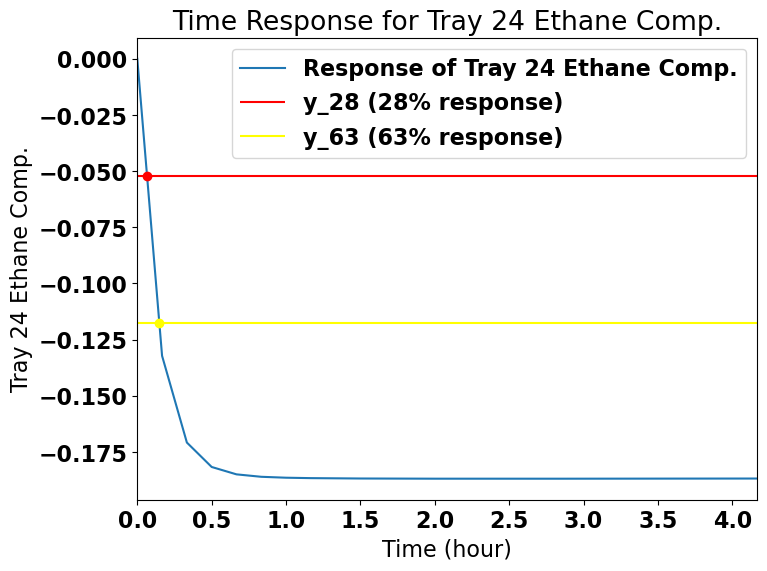

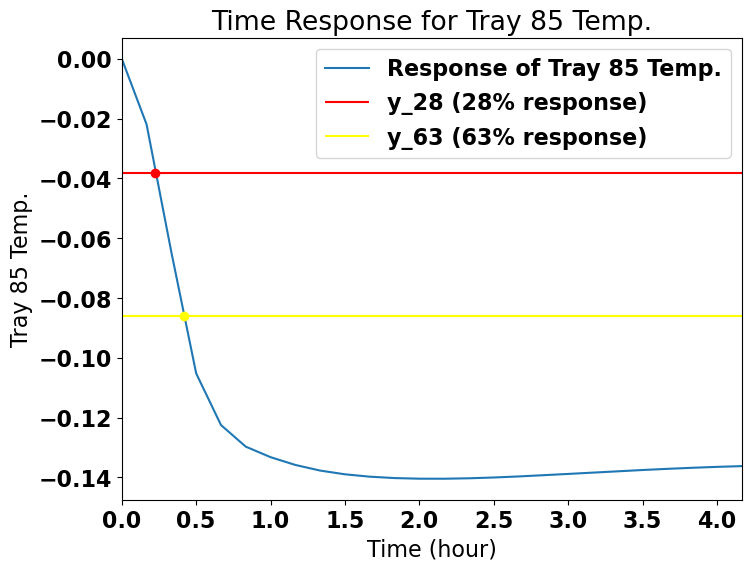


Transfer Function details for input mode "Reflux Flow":
Tray 24 Ethane Comp.: {'Time 63 (hrs)': 0.145, 'Time 28 (hrs)': 0.065, 'kp': -0.18683406087306617, 'taup': 0.11999999999999998, 'theta': -0.014999999999999986}
Tray 85 Temp.: {'Time 63 (hrs)': 0.42, 'Time 28 (hrs)': 0.22, 'kp': -0.1364704205738793, 'taup': 0.3, 'theta': 0.020000000000000018}


In [24]:
Reflux_dict, Reflux_data = data_time28_63_dict(deviation_dfs["Reflux"], mode=0, sampling_period=delta_t)

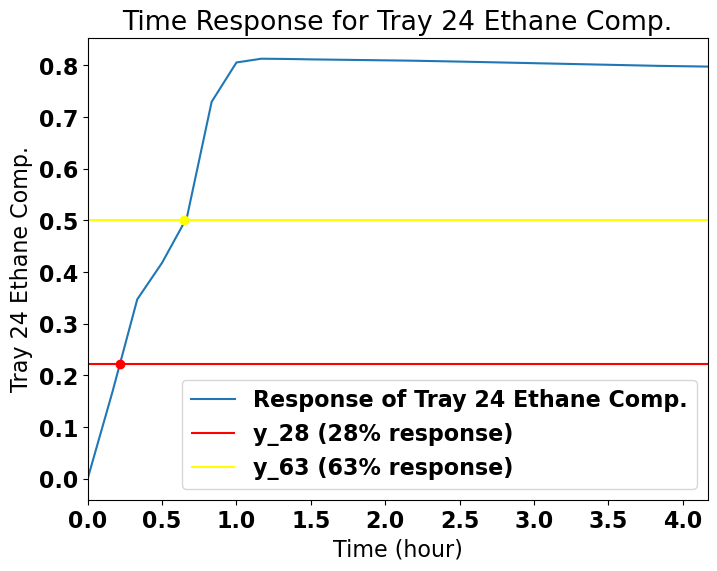

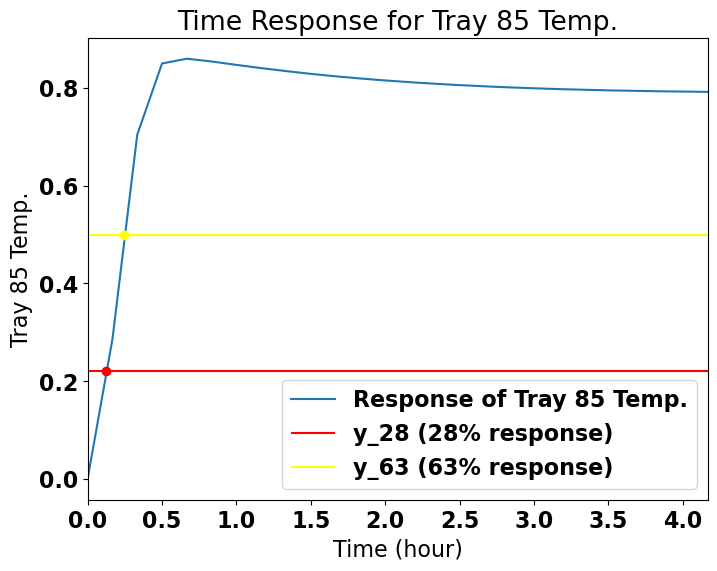


Transfer Function details for input mode "Reboiler Duty":
Tray 24 Ethane Comp.: {'Time 63 (hrs)': 0.65, 'Time 28 (hrs)': 0.215, 'kp': 0.7964134724053891, 'taup': 0.6525000000000001, 'theta': -0.22000000000000006}
Tray 85 Temp.: {'Time 63 (hrs)': 0.245, 'Time 28 (hrs)': 0.12, 'kp': 0.7903741530022781, 'taup': 0.1875, 'theta': -0.0050000000000000044}


In [25]:
Reboiler_dict, Reboiler_data = data_time28_63_dict(deviation_dfs["Reboiler"], mode=1, sampling_period=delta_t)

In [26]:
delay_list = [Reflux_dict["Tray 24 Ethane Comp."]["theta"], Reboiler_dict["Tray 24 Ethane Comp."]["theta"],
              Reflux_dict["Tray 85 Temp."]["theta"], Reboiler_dict["Tray 85 Temp."]["theta"]]
for i, value in enumerate(delay_list):
    if value < 0.0:
        delay_list[i] = 0.0
delay_list

[0.0, 0.0, 0.020000000000000018, 0.0]

In [27]:
A, B, C, D, y_dis_model_ss_ab_delay, tOut = state_space_form_using_matlab(Reflux_dict, Reboiler_dict, delay_list, Reflux_data, Reboiler_data, sampling_time=1/6)

In [28]:
# from nfoursid.kalman import Kalman
# from nfoursid.nfoursid import NFourSID
# from nfoursid.state_space import StateSpace
# 
# # names must match the CSV headers exactly
# input_cols = ["Reflux Flow", "Reboiler Duty"]
# output_cols = ["Tray 24 Ethane Comp.", "Tray 85 Temp."]
# 
# df1 = deviation_dfs["Reflux"].copy()
# df2 = deviation_dfs["Reboiler"].copy()
# # df1 = pd.read_csv(Qc_path)
# # df2 = pd.read_csv(Qm_path)
# 
# df_all = pd.concat([df1, df2], ignore_index=True)
# print("Combined dataframe shape:", df_all.shape)
# 
# # Subspace Identification
# hankel_rows = 8
# 
# nfoursid = NFourSID(
#     df_all,
#     output_columns=output_cols,
#     input_columns=input_cols,
#     num_block_rows=hankel_rows,
# )
# 
# nfoursid.subspace_identification()

In [29]:
# fig, ax = plt.subplots(figsize=(10, 8))
# nfoursid.plot_eigenvalues(ax)
# fig.tight_layout()

In [30]:
# ORDER_OF_MODEL_TO_FIT = 4
# state_space_identified, covariance_matrix = nfoursid.system_identification(
#     rank=ORDER_OF_MODEL_TO_FIT
# )

In [31]:
# kalman = Kalman(state_space_identified, covariance_matrix)

In [32]:
# state_space = StateSpace(state_space_identified.a,
#                          state_space_identified.b,
#                          state_space_identified.c,
#                          state_space_identified.d)

In [33]:
# for i in range(df_all.shape[0]):
#     
#     y = state_space.step(df_all.values[i, :2].reshape(-1, 1))
#     kalman.step(y, df_all.values[i, :2].reshape(-1, 1))

In [34]:
# fig = plt.figure(figsize=(10, 8))
# kalman.plot_filtered(fig)
# fig.tight_layout()

In [35]:
# fig = plt.figure(figsize=(10, 8))
# kalman.plot_predicted(fig)
# fig.tight_layout()

In [36]:
# kalman.to_dataframe().columns

In [37]:
# plt.plot(kalman.to_dataframe().values[:, [0, 1]])

In [38]:
# plt.plot(kalman.to_dataframe().values[:, [7, 8]])

In [39]:
# A, B, C, D = (state_space_identified.a,
#               state_space_identified.b,
#               state_space_identified.c,
#               state_space_identified.d)

In [40]:
# print("A =\n", A)
# print("B =\n", B)
# print("C =\n", C)
# print("D =\n", D)

In [41]:
# # Plot predictions
# U = df_all[input_cols].to_numpy()
# Y = df_all[output_cols].to_numpy()
# 
# #  
# N = U.shape[0]
# n, m = B.shape  # states, inputs
# p = C.shape[0]  # outputs
# x_hat = np.zeros((n, 1))
# x_hist = np.zeros((N + 1, n))
# y_recons = np.zeros((N, p))
# 
# x_hist[0] = x_hat.flatten()
# 
# for k in range(N):
#     u_k = U[k].reshape(-1, 1)
#     # predicted output
#     y_hat_k = C @ x_hat + D @ u_k
#     y_recons[k] = y_hat_k.flatten()
# 
#     # state update
#     x_hat = A @ x_hat + B @ u_k
#     x_hist[k + 1] = x_hat.flatten()
# 
# time = np.arange(N) * 1/6
# 
# fig, ax = plt.subplots(2, 1, figsize=(8, 10))
# ax[0].plot(time, Y[:, 0], label="measured")
# ax[0].plot(time, y_recons[:, 0], '--', label="reconstructed")
# ax[0].set_ylabel("Tray 24 C₂H₆ (scaled)")
# ax[0].legend()
# 
# ax[1].plot(time, Y[:, 1])
# ax[1].plot(time, y_recons[:, 1], '--')
# ax[1].set_ylabel("Tray 85 Temp (scaled)")
# ax[1].set_xlabel("sample k  (10-min each)")
# plt.suptitle("One-step reconstruction with identified state-space model")
# plt.tight_layout()
# plt.show()

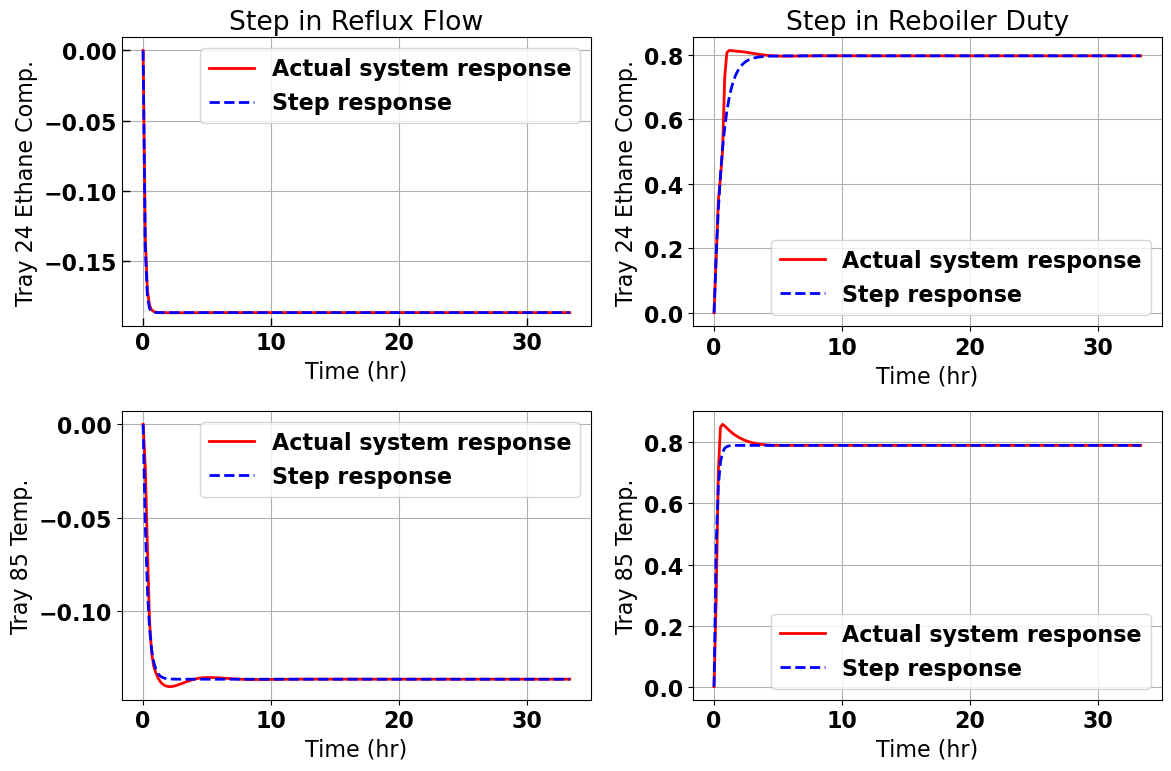

In [42]:
plot_results_statespace(tOut, y_dis_model_ss_ab_delay, Reflux_data, Reboiler_data)

In [43]:
# Saving A, B, C matrices
system_dict = {"A": A,
               "B": B,
               "C": C,
               "D": D,}
data_dir = os.path.join(os.getcwd(), 'Data')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
save_path = os.path.join(data_dir, "system_dict.pickle")
with open(save_path, 'wb') as file:
    pickle.dump(system_dict, file)

In [44]:
# Saving min max data
scaling_factor = {"min": data_min,
               "max": data_max}
save_path = os.path.join(data_dir, "scaling_factor.pickle")
with open(save_path, 'wb') as file:
    pickle.dump(scaling_factor, file)